In [16]:
import random
from hashlib import sha256
from sage.crypto.util import carmichael_lambda

In [17]:
random.seed(100)

## Part 1

In [18]:
p = 61
q = 53
assert is_prime(p)
assert is_prime(q)
n = p*q

In [19]:
# Carmichael's totient function of the product λ(n) = lcm(p−1, q−1)
lamb = 780 # let's assume that we have this already computed for p=61, q=53
lamb1 = carmichael_lambda(n)
lamb2 = lcm(p - 1, q - 1)
assert(lamb1, lamb2)
assert(lamb, lamb2)

In [20]:
def hash(m):
    hex_hash = sha256(str(m).encode("utf-8")).hexdigest()
    return int(hex_hash, 16)

In [21]:
# **************
# TODO:
# Implement the methods:
# - new_key
#     (you can hardcode the 'e' parameter using the same than
#     in the Wikipedia's example (e=17))
# - encrypt
# - decrypt
# **************

lambR = IntegerModRing(lamb)
nR = IntegerModRing(n)

def my_xgcd(n, m):
    if n == 0:
        return (m, 0, 1) if m >= 0 else (-m, 0, -1)
    else:
        g, x, y = my_xgcd(m % n, n)
        return (g, y - (m // n) * x, x)
    
def invmod(a, n):
    return my_xgcd(a, n)

def new_key(n, lamb):
    e = 17
    d = invmod(e, lamb)[1] % lamb
    d1 = lambR(e).inverse_of_unit()
    assert (d, d1)
    return (e, d)

In [22]:
def encrypt(n, e, m):
    acc = 1
    for i in range(e):
        acc = (acc * m) % n
    acc1 = nR(m)**e
    assert(acc, acc1)
    return acc

In [23]:
def decrypt(n, d, c):
    acc = 1
    for i in range(d):
        acc = (acc * c) % n
    acc1 = nR(c)**d
    assert(acc, acc1)
    return acc

In [24]:
def sign(n, d,  m):
    return nR(hash(m)) ** d

In [25]:
def check_sign(n, e, m, s):
    assert(nR(hash(m)) == s ** e)

In [26]:
# generate a new key pair:
e, d = new_key(n, lamb)
print("PubK: e: %s" % e)
print("PrivK: d: %s" % d)

PubK: e: 17
PrivK: d: 413


In [27]:
# set message m:
m = 65

In [28]:
c = encrypt(n, e, m)
print("Encrypted message:", c)

Encrypted message: 2790


In [29]:
m2 = decrypt(n, d, c)
print("Decrypted message:", m2)

Decrypted message: 65


In [30]:
s = sign(n, d, m)
print("Signature:", s)

Signature: 2859


In [31]:
check_sign(n, e, m, s)

In [32]:
# check that the decrypted message (m2) is equal to the original message (m)
assert m2 == m

## Part 2

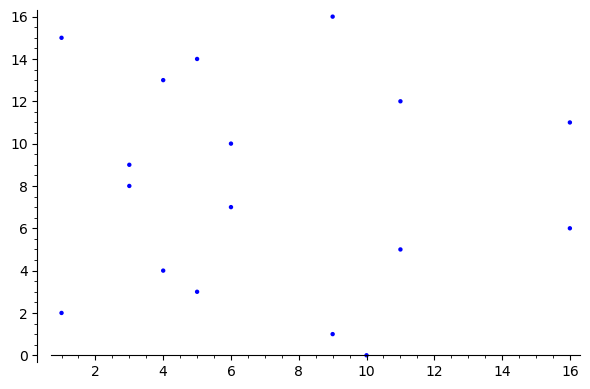

In [114]:
F = FiniteField(17)
E = EllipticCurve(F, [0,3])
plot = E.plot()
e_plot

In [115]:
order = E.order()
print("Order: %s" % order)

Order: 18


Random point: (4 : 13 : 1)


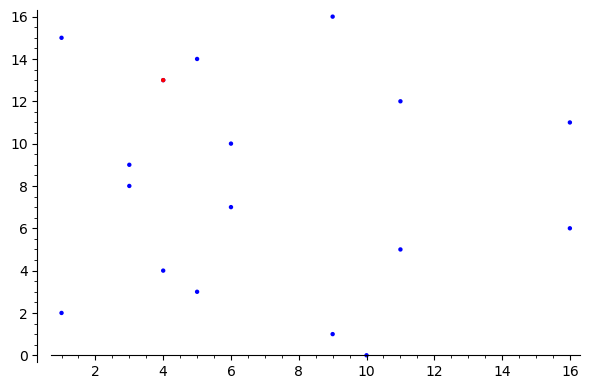

In [132]:
rand_point = E.points()[randint(0, E.order() - 1)]
print("Random point: %s" % rand_point)
point_plot = list_plot([rand_point.xy()], color='red')
e_plot + point_plot 